<a href="https://colab.research.google.com/github/SaulHL08/Notebooks-Datos-Masivos/blob/main/datasetpc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import random

# Crear el archivo CSV y escribir los datos
with open('dataset_computadoras.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Escribir encabezados
    headers = ['RAM (GB)', 'ROM (GB)', 'Núcleos CPU', 'Placa Base', 'GPU', 'Fuente', 'Gabinete', 'Consumo de Watts', 'Potencia']
    writer.writerow(headers)

    # Escribir filas de datos
    for _ in range(1000):
        ram = random.randint(4, 64)
        rom = random.randint(128, 1024)
        nucleos_cpu = random.randint(2, 16)
        placabase = random.choice(['A', 'B', 'C'])
        gpu = random.choice(['Integrated', 'Dedicated'])
        fuente = random.choice(['350W', '500W', '750W'])
        gabinete = random.choice(['Mini Tower', 'Mid Tower', 'Full Tower'])
        consumo_watts = random.randint(100, 800)
        potencia = min(4, (ram // 8) + (nucleos_cpu // 4))  # Calcula la potencia

        writer.writerow([ram, rom, nucleos_cpu, placabase, gpu, fuente, gabinete, consumo_watts, potencia])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Cargar el dataset
df = pd.read_csv('dataset_computadoras.csv')

# Dividir el dataset en características (X) y etiquetas (y)
X = df[['RAM (GB)', 'Núcleos CPU']]
y = df['Potencia']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador XGBoost
clf = xgb.XGBClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Predecir la potencia en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy*100:.2f}%')


Precisión del modelo: 100.00%


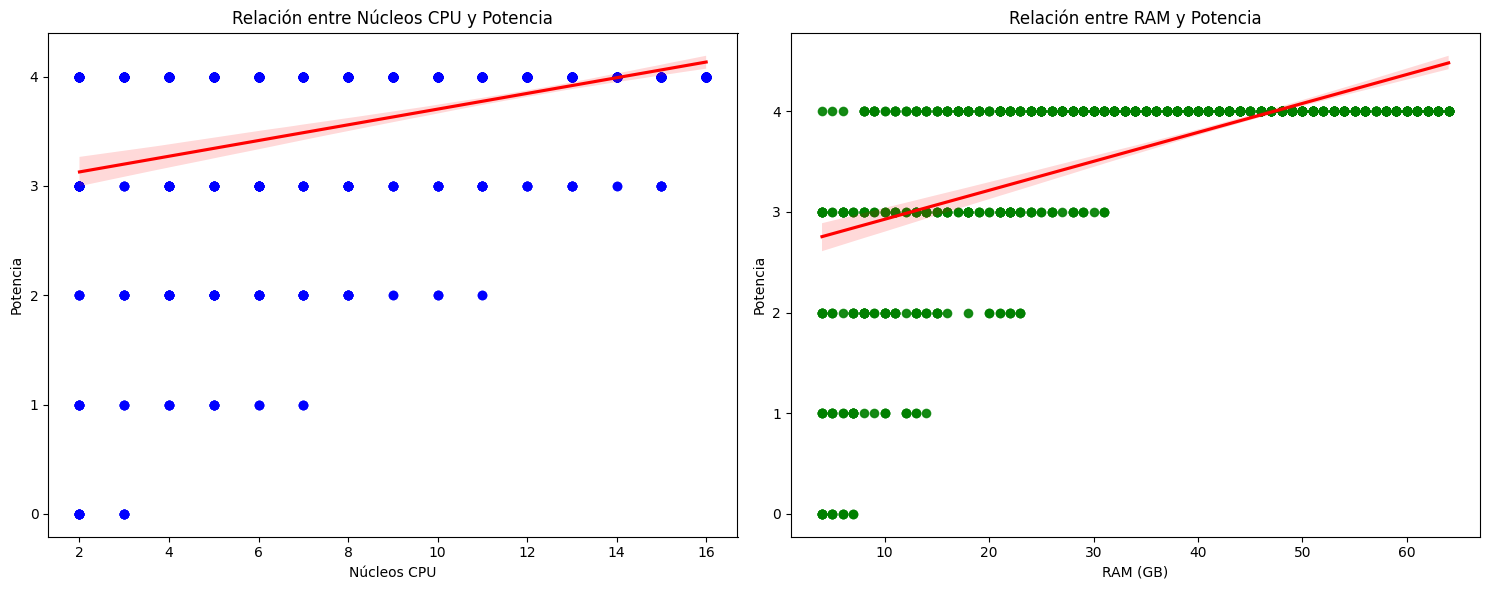

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('dataset_computadoras.csv')

# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Relación entre Núcleos CPU y Potencia
sns.scatterplot(x='Núcleos CPU', y='Potencia', data=df, ax=ax1, color='blue', alpha=0.6)
sns.regplot(x='Núcleos CPU', y='Potencia', data=df, ax=ax1, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax1.set_title('Relación entre Núcleos CPU y Potencia')

# Gráfico 2: Relación entre RAM y Potencia
sns.scatterplot(x='RAM (GB)', y='Potencia', data=df, ax=ax2, color='green', alpha=0.6)
sns.regplot(x='RAM (GB)', y='Potencia', data=df, ax=ax2, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
ax2.set_title('Relación entre RAM y Potencia')

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



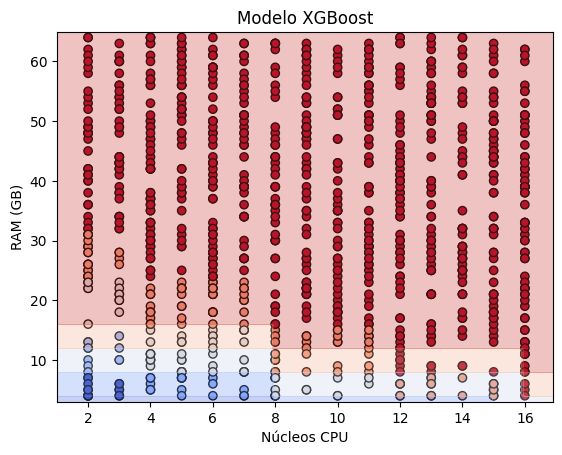

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
df = pd.read_csv('dataset_computadoras.csv')

# Dividir el dataset en características (X) y etiquetas (y)
X = df[['RAM (GB)', 'Núcleos CPU']]
y = df['Potencia']

# Crear el clasificador XGBoost
clf = xgb.XGBClassifier()
clf.fit(X, y)

# Crear una malla de puntos para visualizar las predicciones
x_min, x_max = X['Núcleos CPU'].min() - 1, X['Núcleos CPU'].max() + 1
y_min, y_max = X['RAM (GB)'].min() - 1, X['RAM (GB)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Obtener las predicciones del modelo
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los puntos de datos
plt.scatter(X['Núcleos CPU'], X['RAM (GB)'], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Etiquetas y título
plt.xlabel('Núcleos CPU')
plt.ylabel('RAM (GB)')
plt.title('Modelo XGBoost')

# Mostrar el gráfico
plt.show()

